In [1]:
#looking at the 18 features from >= 4 CIMP+ occurrences
import os
import csv
import statistics

inpdat = "../../../selectedfeatures2withcimplow.csv"

with open(inpdat,'r') as f:
    it = csv.reader(f)
    listit = list(it)

with open('../../../coadreadDATb4.csv','r') as f:
    it = csv.reader(f)
    datall = list(it)

target = "KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T_Missense-Mutation-SNP-C-A-A"

print("col # of old:",len(listit[0]))

col # of old: 70


In [2]:
holdhits = []
nonkras = []
lowtot = negtot = 0
for x in range(1,len(listit)):
    if(float(listit[x][listit[0].index(target)]) == 1.0):
        if(float(listit[x][len(listit[0])-1]) == 1.0):
            #store samples
            holdhits.append(listit[x][0])
        #check how many cimp-low samples there are
        elif(float(listit[x][len(listit[0])-1]) == 2.0):
            lowtot += 1
        elif(float(listit[x][len(listit[0])-1]) == -1.0):
            negtot += 1
    else:
        if(float(listit[x][len(listit[0])-1]) == 1.0):
            #store samples
            nonkras.append(listit[x][0])

print("KRAS CIMP-Low: ", lowtot,"KRAS Negative/Clust3&4: ",negtot)
holdhits

KRAS CIMP-Low:  10 KRAS Negative/Clust3&4:  12


['TCGA-AA-3715',
 'TCGA-AA-3837',
 'TCGA-AA-3870',
 'TCGA-AA-3941',
 'TCGA-AA-3994',
 'TCGA-AA-A029',
 'TCGA-AA-A02O',
 'TCGA-AA-A03F']

In [3]:
bplotdat = []

storage = {}
totals = {}
for x in range(1,len(datall)):
    if(datall[x][0] in holdhits):
        totals[datall[x][0]] = 0
        for y in range(1,len(datall[0])-1):
            if(float(datall[x][y]) == 1.0):
                if(datall[0][y].split("_")[0] not in storage):
                    storage[datall[0][y].split("_")[0]] = 0
                storage[datall[0][y].split("_")[0]] += 1
                totals[datall[x][0]] += 1
bplotdat.append(list(totals.values()))

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(range(len(totals)), list(totals.values()))
plt.title("Number of mutations in CIMP-H samples with KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T_Missense-Mutation-SNP-C-A-A")
plt.ylabel("Number of mutations")
plt.xlabel("Samples")
plt.xticks(range(len(totals)), list(totals.keys()),ha='left',rotation=-30)
plt.show

<function matplotlib.pyplot.show>

In [5]:
totals = {}
for x in range(1,len(datall)):
    if(datall[x][0] in nonkras):
        totals[datall[x][0]] = 0
        for y in range(1,len(datall[0])-1):
            if(float(datall[x][y]) == 1.0):
                totals[datall[x][0]] += 1
bplotdat.append(list(totals.values()))

<function matplotlib.pyplot.show>

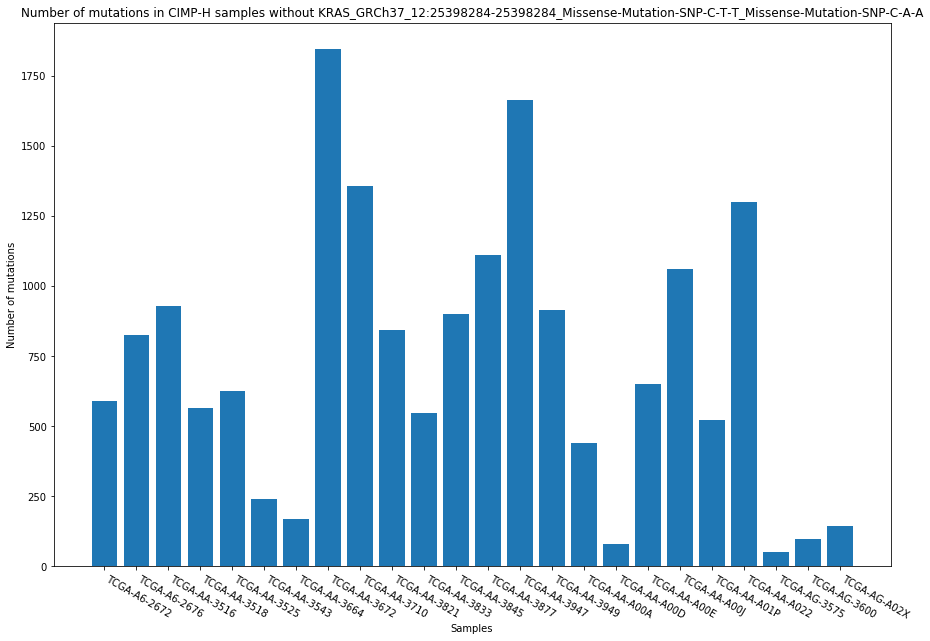

In [6]:
plt.figure(figsize=(15,10))
plt.bar(range(len(totals)), list(totals.values()))
plt.xticks(range(len(totals)), list(totals.keys()),ha='left',rotation=-30)
plt.title("Number of mutations in CIMP-H samples without KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T_Missense-Mutation-SNP-C-A-A")
plt.ylabel("Number of mutations")
plt.xlabel("Samples")
plt.show

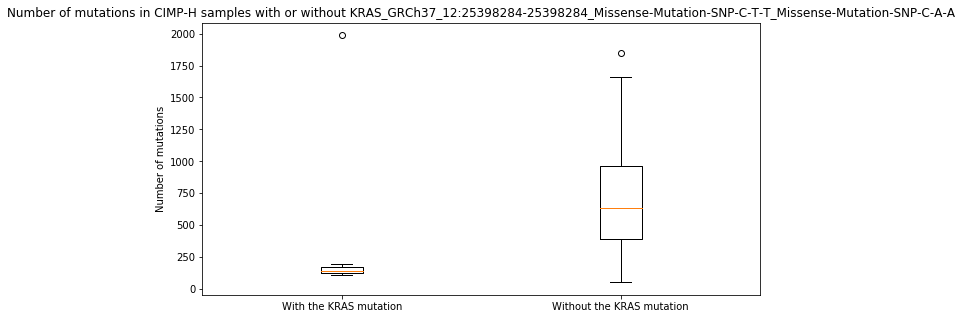

In [7]:
#make a boxplot
plt.figure(figsize=(10,5))
plt.boxplot(bplotdat)
plt.title("Number of mutations in CIMP-H samples with or without KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T_Missense-Mutation-SNP-C-A-A")
plt.ylabel("Number of mutations")
plt.xticks([1,2],["With the KRAS mutation", "Without the KRAS mutation"])
plt.show()

In [12]:
#export mutations
import pprint
import operator
pprint.pprint(sorted(storage.items(), key=operator.itemgetter(1), reverse=True))

[('TTN', 19),
 ('APC', 11),
 ('KRAS', 8),
 ('RYR2', 6),
 ('SYNE1', 6),
 ('PIK3CA', 5),
 ('SYNE2', 5),
 ('RYR3', 5),
 ('MUC16', 5),
 ('ROBO1', 5),
 ('ACVR1B', 4),
 ('AHNAK2', 4),
 ('DNAH3', 4),
 ('LRP2', 4),
 ('PCLO', 4),
 ('FAM135B', 4),
 ('COL12A1', 4),
 ('TGFBR2', 3),
 ('OGDHL', 3),
 ('ITIH5', 3),
 ('AHNAK', 3),
 ('GRM5', 3),
 ('CHD4', 3),
 ('PCDH17', 3),
 ('LINGO1', 3),
 ('CREBBP', 3),
 ('FAM65A', 3),
 ('TEX14', 3),
 ('EPB41L3', 3),
 ('ZNF236', 3),
 ('USH2A', 3),
 ('OR2M4', 3),
 ('CSMD2', 3),
 ('CD93', 3),
 ('PCNT', 3),
 ('MYT1L', 3),
 ('FN1', 3),
 ('COL4A4', 3),
 ('MSH6', 3),
 ('PLCH1', 3),
 ('SCN5A', 3),
 ('ITPR1', 3),
 ('NBEAL2', 3),
 ('FEZF2', 3),
 ('CADPS', 3),
 ('SYNPO2', 3),
 ('PCDHGA2', 3),
 ('PRDM9', 3),
 ('GRIK2', 3),
 ('DUSP22', 3),
 ('LRFN2', 3),
 ('RIMS1', 3),
 ('MDN1', 3),
 ('MUC17', 3),
 ('RELN', 3),
 ('LRRN3', 3),
 ('COL1A2', 3),
 ('ZKSCAN5', 3),
 ('CSMD3', 3),
 ('CSMD1', 3),
 ('ZFHX4', 3),
 ('DFNB31', 3),
 ('CAMSAP1', 3),
 ('TENM1', 3),
 ('SDK1', 3),
 ('FLG', 3),
 (

 ('EHMT1', 1),
 ('ADAMTSL1', 1),
 ('FAM154A', 1),
 ('IFNA16', 1),
 ('ELAVL2', 1),
 ('KCNV2', 1),
 ('FANCG', 1),
 ('UNC13B', 1),
 ('GBA2', 1),
 ('NPR2', 1),
 ('OR13J1', 1),
 ('GNE', 1),
 ('CNTNAP3', 1),
 ('JAK2', 1),
 ('SPATA31A7', 1),
 ('TLE4', 1),
 ('CTSL', 1),
 ('SHC3', 1),
 ('NOL8', 1),
 ('PTCH1', 1),
 ('ZNF510', 1),
 ('SLC31A2', 1),
 ('GOLGA2', 1),
 ('RABL6', 1),
 ('ZNF658', 1),
 ('FAM74A3', 1),
 ('PNMA3', 1),
 ('TCEAL4', 1),
 ('RNF128', 1),
 ('TEX13B', 1),
 ('ZBTB33', 1),
 ('GRIA3', 1),
 ('DCAF12L2', 1),
 ('OCRL', 1),
 ('ARHGAP36', 1),
 ('IL3RA', 1),
 ('SLITRK4', 1),
 ('MAGEA6', 1),
 ('PNMA5', 1),
 ('FIGF', 1),
 ('MECP2', 1),
 ('MTCP1', 1),
 ('GRPR', 1),
 ('PDHA1', 1),
 ('CNKSR2', 1),
 ('DHRSX', 1),
 ('MBTPS2', 1),
 ('ACOT9', 1),
 ('FAM47C', 1),
 ('MED14', 1),
 ('USP11', 1),
 ('SYN1', 1),
 ('TBC1D25', 1),
 ('OTUD5', 1),
 ('MAGED1', 1),
 ('SMC1A', 1),
 ('RIBC1', 1),
 ('PFKFB1', 1),
 ('ALAS2', 1),
 ('RRAGB', 1),
 ('AR', 1),
 ('PJA1', 1),
 ('P2RY4', 1),
 ('PCDH19', 1),
 ('TSPAN6', 1)

In [13]:
holdhits

['TCGA-AA-3715',
 'TCGA-AA-3837',
 'TCGA-AA-3870',
 'TCGA-AA-3941',
 'TCGA-AA-3994',
 'TCGA-AA-A029',
 'TCGA-AA-A02O',
 'TCGA-AA-A03F']